## import

In [1]:
from query import SupSwapExchangeV3
from utils import get_client, query_until_end

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
SUPSWAP_EXCHANGE_V3_ENDPOINT = "https://api.goldsky.com/api/public/project_clrhmyxsvvuao01tu4aqj653e/subgraphs/supswap-exchange-v3/1.0.0/gn"

In [4]:
client = get_client(SUPSWAP_EXCHANGE_V3_ENDPOINT)
dd = SupSwapExchangeV3(client)

having a closer look at schemas and fields, this exchange looks like a uniswap-v3 fork.

Stats fetched & calculated & visualized:

- daily new and total pairs available within the exchange.
- daily new and total (unique) tokens available within the exchange.
- daily & total volume denominated in eth (aggregated across exchange).
- daily & total volume denominated in usd (aggregated across exchange).
- daily & total fee denominated in usd (aggregated across exchange).
- total tvl denominated in eth (aggregated across exchange).
- total tvl denominated in usd (aggregated across exchange).
- daily new and total transactions (aggregated across exchange).
- daily new and total swaps (aggregated across exchange).
- daily & total volume denominated in usd (for each pair).
- tvl denominated in usd (for each pair).
- daily & total fees denominated in usd (for each pair).
- daily new and total transactions (for each pair).
- daily new and total swaps (for each pair).

### Pools & Tokens

In [5]:
pools_data = await dd.query_pools()
df_pools_data = dd.parse_pools_data(pools_data)
df_pools = dd.get_df_pools(df_pools_data)
df_tokens = dd.df_tokens(df_pools_data)

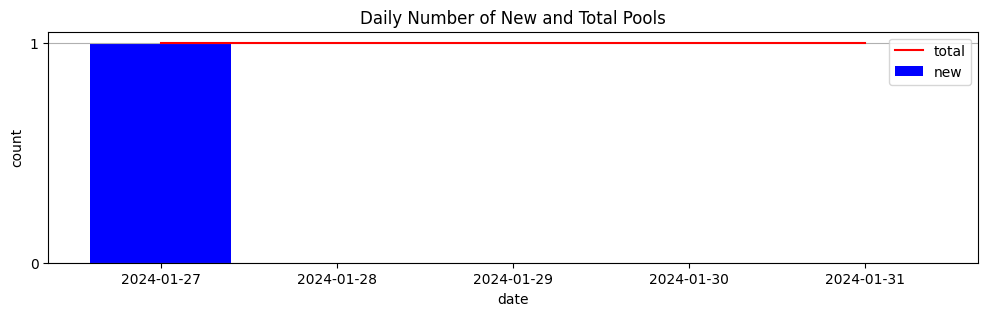

In [6]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_pools.index,
    df_pools["new_pool_count"],
    color="blue",
    label="new",
)
ax.plot(
    df_pools.index,
    df_pools["total_pool_count"],
    color="red",
    label="total",
)
plt.grid(axis="y")
plt.title("Daily Number of New and Total Pools")
plt.xlabel("date")
plt.ylabel("count")
plt.yticks(
    list(
        set(
            df_pools["new_pool_count"].values
        ).union(
            set(
                range(0, df_pools["total_pool_count"].max(), 5)
            )
        )
    )
)
plt.legend()
plt.show()

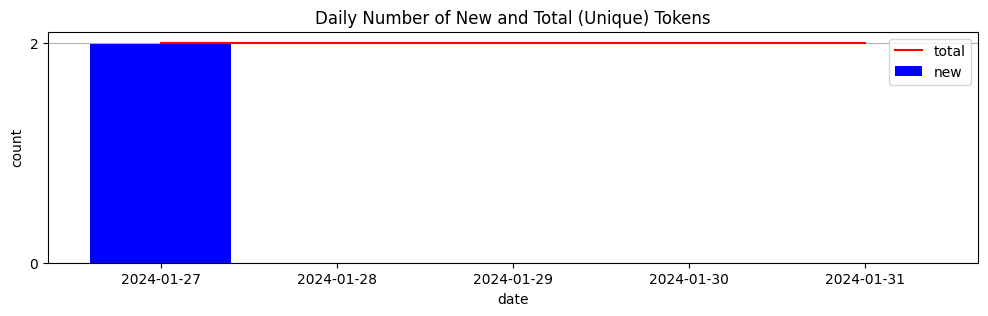

In [7]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_tokens.index,
    df_tokens["new_token_count"],
    color="blue",
    label="new",
)
ax.plot(
    df_tokens.index,
    df_tokens["total_token_count"],
    color="red",
    label="total",
)
plt.grid(axis="y")
plt.title("Daily Number of New and Total (Unique) Tokens")
plt.xlabel("date")
plt.ylabel("count")
plt.yticks(
    list(
        set(
            df_tokens["new_token_count"].values
        ).union(
            set(
                range(0, df_tokens["total_token_count"].max(), 5)
            )
        )
    )
)
plt.legend()
plt.show()

### Aggregated / Total Stats (TVL, Volume, Fees)

In [8]:
exchange_day_data = await dd.query_exchange_day_data()
df_exchange_day_data = dd.parse_exchange_day_data(exchange_day_data)

swaps_data = await dd.query_swaps_data()
df_swaps_data = dd.parse_swaps_data(swaps_data)

df_exchange_day = dd.get_df_exchange_day(df_exchange_day_data, df_swaps_data)

In [9]:
df_exchange_day

,id,dailyVolumeETH,dailyVolumeUSD,dailyVolumeUntracked,totalLiquidityUSD,dailyFeeUSD,totalTransactions,totalVolumeETH,totalVolumeUSD,totalFeeUSD,dailyTransactions,new_swap_count,daily_fee_in_usd,total_swap_count,total_fee_in_usd
date,,,,,,,,,,,,,,,
2024-01-27 00:00:00+00:00,19749,0.002766,0.000000,0.0,290.149721,0.000000,2,0.002766,0.000000,0.000000,2,1,0.000000,1,0.000000
2024-01-30 00:00:00+00:00,19752,0.015118,34.223052,0.0,10655.167965,0.017112,13,0.017884,34.223052,0.017112,11,6,0.004538,7,0.004538
2024-01-31 00:00:00+00:00,19753,2.677676,6094.580367,0.0,9912.258152,3.047290,119,2.695560,6128.803419,3.064402,106,100,1.140871,107,1.145409


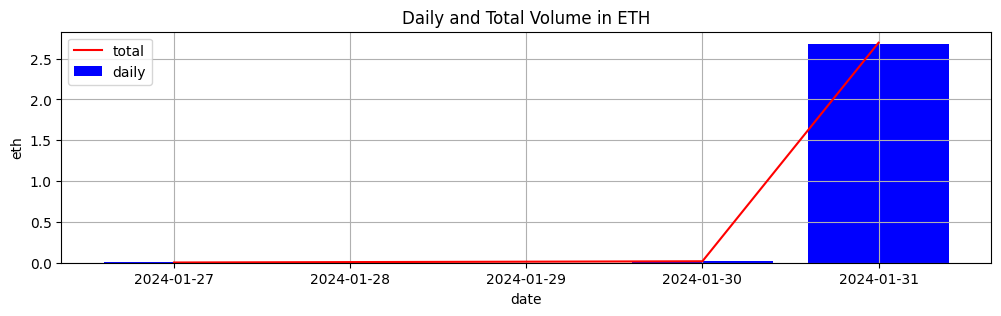

In [10]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_exchange_day.index,
    df_exchange_day["dailyVolumeETH"],
    color="blue",
    label="daily",
)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["totalVolumeETH"],
    color="red",
    label="total",
)
plt.grid()
plt.title("Daily and Total Volume in ETH")
plt.xlabel("date")
plt.ylabel("eth")
plt.legend()
plt.show()

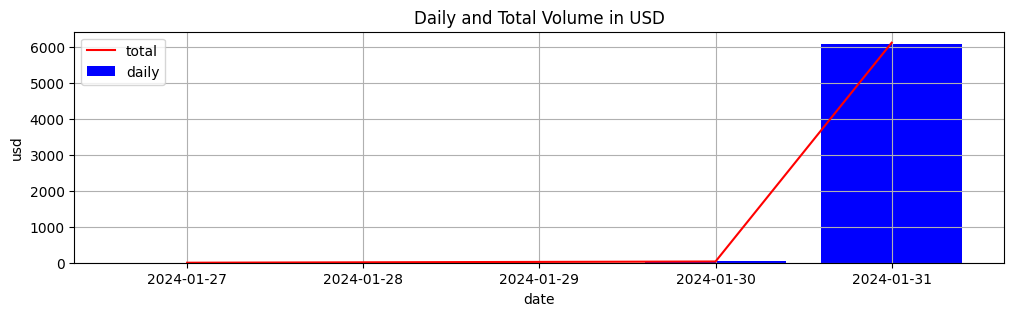

In [11]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_exchange_day.index,
    df_exchange_day["dailyVolumeUSD"],
    color="blue",
    label="daily",
)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["totalVolumeUSD"],
    color="red",
    label="total",
)
plt.grid()
plt.title("Daily and Total Volume in USD")
plt.xlabel("date")
plt.ylabel("usd")
plt.legend()
plt.show()

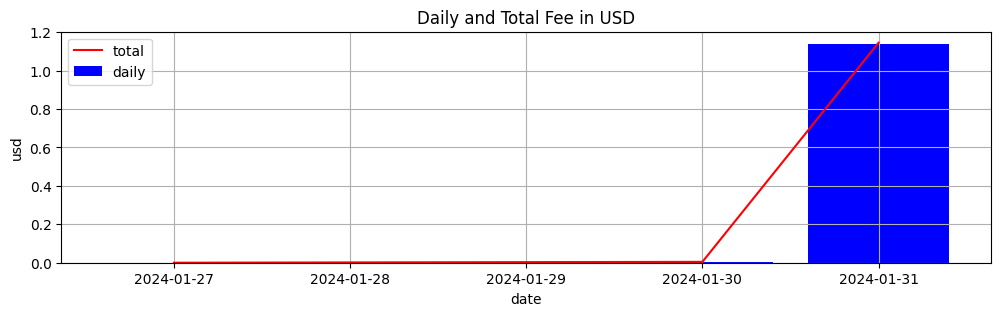

In [12]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_exchange_day.index,
    df_exchange_day["daily_fee_in_usd"],
    color="blue",
    label="daily",
)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["total_fee_in_usd"],
    color="red",
    label="total",
)
plt.grid()
plt.title("Daily and Total Fee in USD")
plt.xlabel("date")
plt.ylabel("usd")
plt.legend()
plt.show()

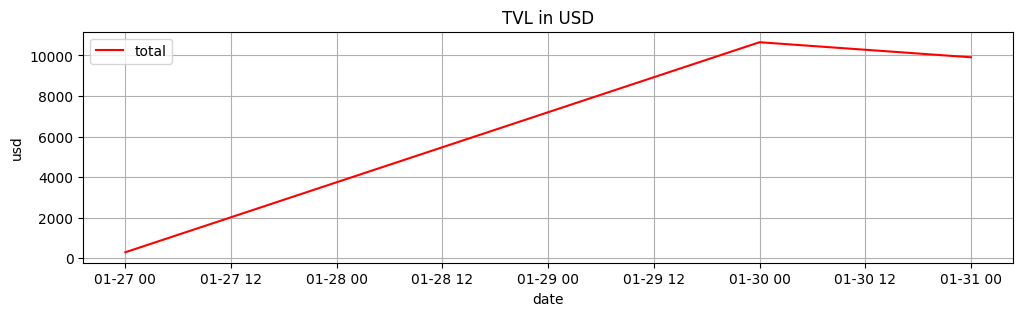

In [13]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["totalLiquidityUSD"],
    color="red",
    label="total",
)
plt.grid()
plt.title("TVL in USD")
plt.xlabel("date")
plt.ylabel("usd")
plt.legend()
plt.show()

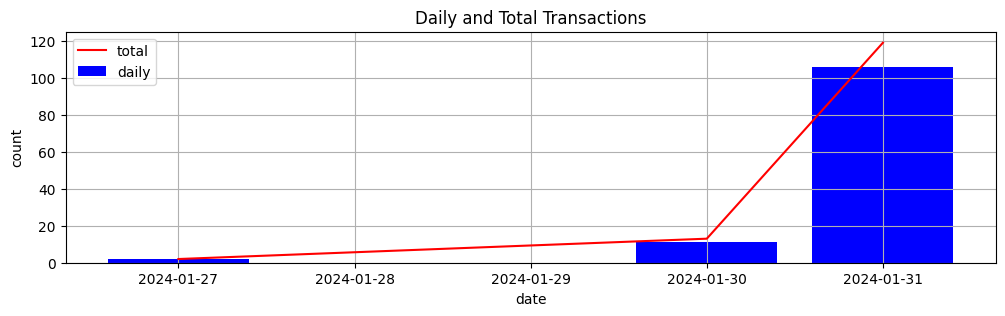

In [14]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_exchange_day.index,
    df_exchange_day["dailyTransactions"],
    color="blue",
    label="daily",
)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["totalTransactions"],
    color="red",
    label="total",
)
plt.grid()
plt.title("Daily and Total Transactions")
plt.xlabel("date")
plt.ylabel("count")
plt.legend()
plt.show()

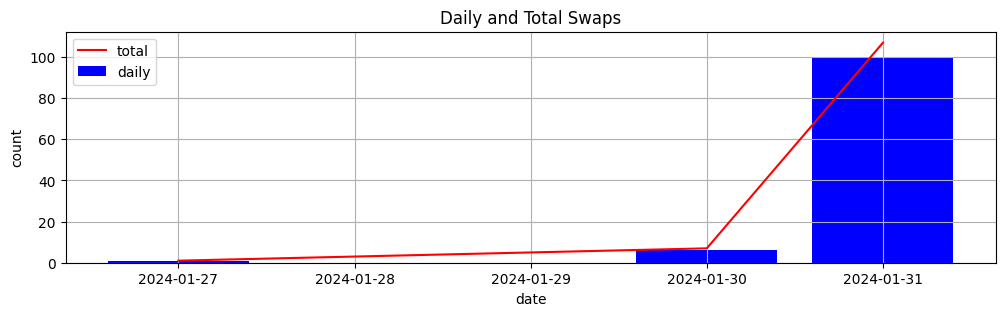

In [15]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(
    df_exchange_day.index,
    df_exchange_day["new_swap_count"],
    color="blue",
    label="daily",
)
ax.plot(
    df_exchange_day.index,
    df_exchange_day["total_swap_count"],
    color="red",
    label="total",
)
plt.grid()
plt.title("Daily and Total Swaps")
plt.xlabel("date")
plt.ylabel("count")
plt.legend()
plt.show()

### Pool Stats (TVL, Volume, Fees)

In [16]:
pool_day_data = await dd.query_pool_day_data()
df_pool_day_data = dd.parse_pool_day_data(pool_day_data)

swaps_data = await dd.query_swaps_data()
df_swaps_data_by_pool = dd.parse_swaps_data_by_pool(swaps_data)

df_pool_day = dd.get_df_pool_day(
    df_pool_day_data,
    df_swaps_data_by_pool,
)

In [17]:
df_pool_day

,id,dailyVolumeUSD,totalLiquidityUSD,dailyFeeUSD,dailyTransactions,pool_id,new_swap_count,daily_fee_in_usd,total_swap_count,total_fee_in_usd,totalVolumeUSD,totalTransactions
date,,,,,,,,,,,,
2024-01-27,0xf2e9c024f1c0b7a2a4ea11243c2d86a7b38dd72f-19749,0.000000,290.149721,0.000000,3,0xf2e9c024f1c0b7a2a4ea11243c2d86a7b38dd72f,1,0.000000,1,0.000000,0.000000,3
2024-01-30,0xf2e9c024f1c0b7a2a4ea11243c2d86a7b38dd72f-19752,34.223052,10655.167965,0.017112,10,0xf2e9c024f1c0b7a2a4ea11243c2d86a7b38dd72f,6,0.004538,7,0.004538,34.223052,13
2024-01-31,0xf2e9c024f1c0b7a2a4ea11243c2d86a7b38dd72f-19753,6094.580367,9912.258152,3.047290,105,0xf2e9c024f1c0b7a2a4ea11243c2d86a7b38dd72f,100,1.140871,107,1.145409,6128.803419,118


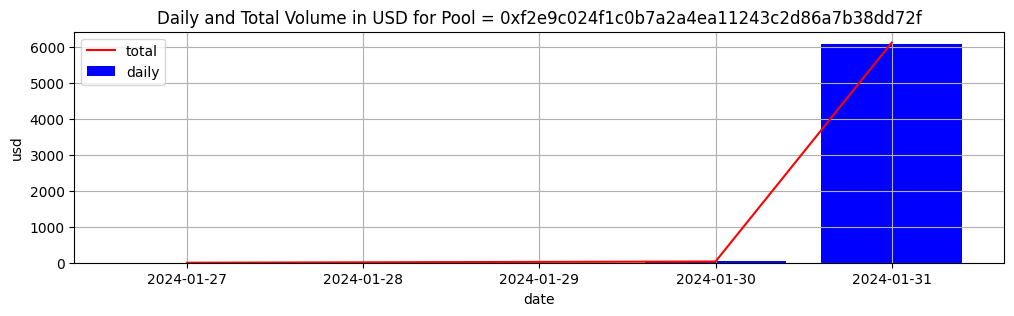

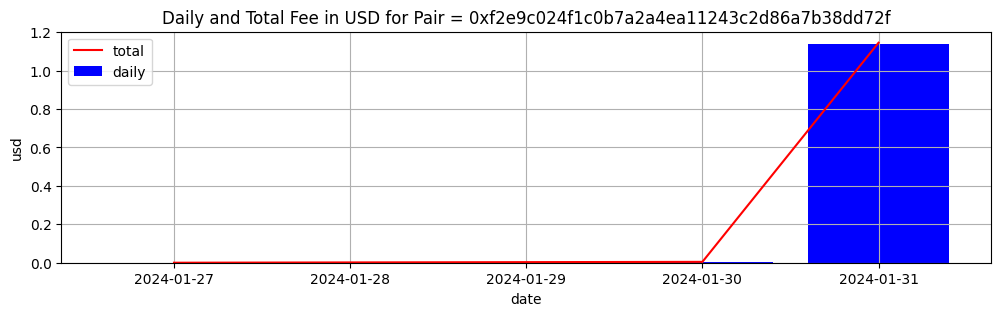

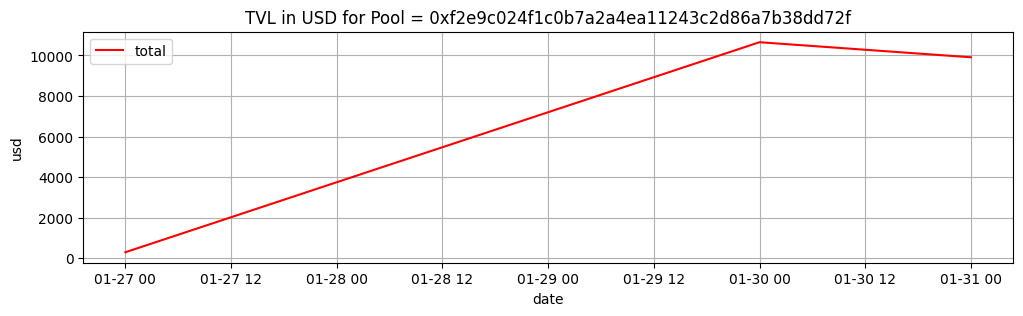

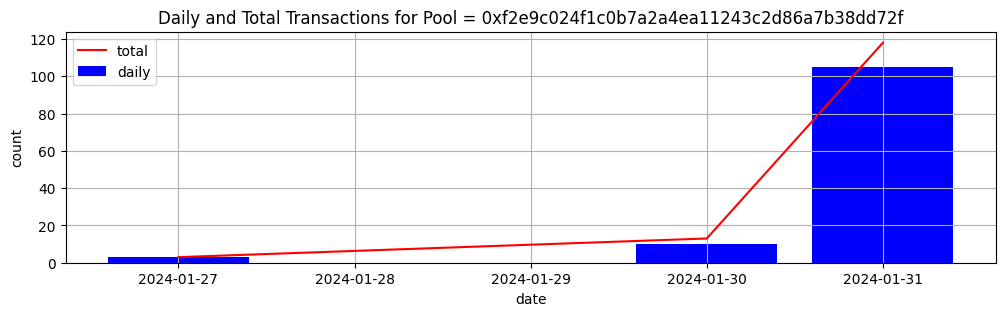

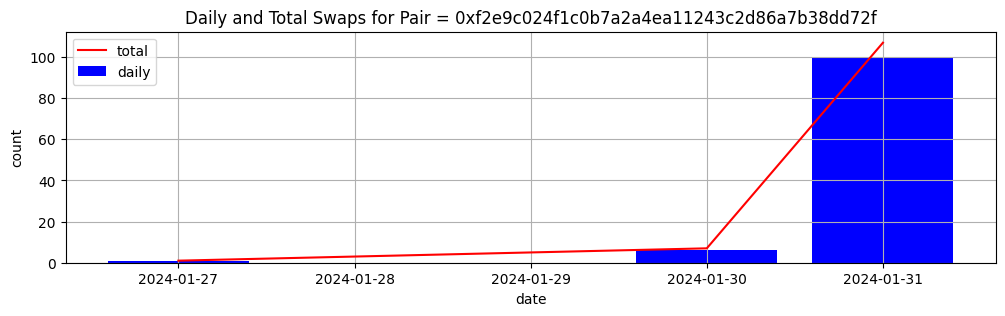

In [18]:
for (pool_id, df_g) in df_pool_day.groupby("pool_id"):
    # usd volume
    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(
        df_g.index,
        df_g["dailyVolumeUSD"],
        color="blue",
        label="daily",
    )
    ax.plot(
        df_g.index,
        df_g["totalVolumeUSD"],
        color="red",
        label="total",
    )
    plt.grid()
    plt.title(f"Daily and Total Volume in USD for Pool = {pool_id}")
    plt.xlabel("date")
    plt.ylabel("usd")
    plt.legend()
    plt.show()

    # fees
    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(
        df_g.index,
        df_g["daily_fee_in_usd"],
        color="blue",
        label="daily",
    )
    ax.plot(
        df_g.index,
        df_g["total_fee_in_usd"],
        color="red",
        label="total",
    )
    plt.grid()
    plt.title(f"Daily and Total Fee in USD for Pair = {pool_id}")
    plt.xlabel("date")
    plt.ylabel("usd")
    plt.legend()
    plt.show()

    # tvl

    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df_g.index,
        df_g["totalLiquidityUSD"],
        color="red",
        label="total",
    )
    plt.grid()
    plt.title(f"TVL in USD for Pool = {pool_id}")
    plt.xlabel("date")
    plt.ylabel("usd")
    plt.legend()
    plt.show()

    # transactions

    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(
        df_g.index,
        df_g["dailyTransactions"],
        color="blue",
        label="daily",
    )
    ax.plot(
        df_g.index,
        df_g["totalTransactions"],
        color="red",
        label="total",
    )
    plt.grid()
    plt.title(f"Daily and Total Transactions for Pool = {pool_id}")
    plt.xlabel("date")
    plt.ylabel("count")
    plt.legend()
    plt.show()

    # swaps
    fig = plt.figure(figsize=(12, 3))
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(
        df_g.index,
        df_g["new_swap_count"],
        color="blue",
        label="daily",
    )
    ax.plot(
        df_g.index,
        df_g["total_swap_count"],
        color="red",
        label="total",
    )
    plt.grid()
    plt.title(f"Daily and Total Swaps for Pair = {pool_id}")
    plt.xlabel("date")
    plt.ylabel("count")
    plt.legend()
    plt.show()